In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
import torch
from point_pillar.pillar_model import PointPillarsClassifier
from point_pillar.pillar_trainer import Trainer
from torch.utils.data import DataLoader
from point_pillar.modelnet_dataset import ModelNetDataset
from point_pillar.config import config

KeyboardInterrupt: 

In [ ]:
import random
import numpy as np

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

def set_seed(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)

    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

    # Enforce deterministic behaviour
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

    # Extra safety for dataloader workers
    os.environ["PYTHONHASHSEED"] = str(seed)

def seed_worker(worker_id):
    import numpy as np
    import random
    seed = 42 + worker_id
    np.random.seed(seed)
    random.seed(seed)

set_seed(42)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
print(config)

{'dataset': {'name': 'ModelNet40', 'num_classes': 40, 'num_points': 1024}, 'voxelizer': {'x_range': (-1.0, 1.0), 'y_range': (-1.0, 1.0), 'z_range': (-1.0, 1.0), 'pillar_size': (0.1, 0.1), 'max_pillars': 1024, 'max_points_per_pillar': 32}, 'pfn': {'in_dim': 8, 'out_dim': 64}, 'backbone': {'base_channels': 32, 'fc1_dim': 256, 'dropout_p': 0.1}, 'train': {'batch_size': 32, 'lr': 0.001, 'weight_decay': 0.0001, 'num_epochs': 80}}


In [ ]:
DATA_DIR = "./data" + "/" + config["dataset"]["name"]
PREDATA_DIR = "./data" + "/" + config["dataset"]["name"] + "_precomputed_" + str(config["dataset"]["num_points"])
# 1. build datasets / loaders using config

train_dataset = ModelNetDataset(
    root=DATA_DIR,
    split="train",
    num_points=config["dataset"]["num_points"],
    normalize=True,
    precomputed_root=PREDATA_DIR,
    cache_mode="write",
)
val_dataset = ModelNetDataset(
    root=DATA_DIR,
    split="test",
    num_points=config["dataset"]["num_points"],
    normalize=True,
    precomputed_root=PREDATA_DIR,
    cache_mode="write",
)

Found 40 classes, 9843 samples
Found 40 classes, 2468 samples


In [ ]:
# for i in range(len(train_dataset)):
#     _ = train_dataset[i]
# for i in range(len(val_dataset)):
#     _ = val_dataset[i]

write mode
saved ./data/ModelNet40_precomputed_1024\airplane\train\airplane_0001.npy
write mode
saved ./data/ModelNet40_precomputed_1024\airplane\train\airplane_0002.npy
write mode
saved ./data/ModelNet40_precomputed_1024\airplane\train\airplane_0003.npy
write mode
saved ./data/ModelNet40_precomputed_1024\airplane\train\airplane_0004.npy
write mode
saved ./data/ModelNet40_precomputed_1024\airplane\train\airplane_0005.npy
write mode
saved ./data/ModelNet40_precomputed_1024\airplane\train\airplane_0006.npy
write mode
saved ./data/ModelNet40_precomputed_1024\airplane\train\airplane_0007.npy
write mode
saved ./data/ModelNet40_precomputed_1024\airplane\train\airplane_0008.npy
write mode
saved ./data/ModelNet40_precomputed_1024\airplane\train\airplane_0009.npy
write mode
saved ./data/ModelNet40_precomputed_1024\airplane\train\airplane_0010.npy
write mode
saved ./data/ModelNet40_precomputed_1024\airplane\train\airplane_0011.npy
write mode
saved ./data/ModelNet40_precomputed_1024\airplane\trai

c:\Users\paull\anaconda3\envs\CS7643-final\Lib\site-packages\trimesh\grouping.py:99: RuntimeWarning: invalid value encountered in cast
  stacked = np.column_stack(stacked).round().astype(np.int64)


saved ./data/ModelNet40_precomputed_1024\curtain\train\curtain_0066.npy
write mode
saved ./data/ModelNet40_precomputed_1024\curtain\train\curtain_0067.npy
write mode
saved ./data/ModelNet40_precomputed_1024\curtain\train\curtain_0068.npy
write mode
saved ./data/ModelNet40_precomputed_1024\curtain\train\curtain_0069.npy
write mode
saved ./data/ModelNet40_precomputed_1024\curtain\train\curtain_0070.npy
write mode
saved ./data/ModelNet40_precomputed_1024\curtain\train\curtain_0071.npy
write mode
saved ./data/ModelNet40_precomputed_1024\curtain\train\curtain_0072.npy
write mode
saved ./data/ModelNet40_precomputed_1024\curtain\train\curtain_0073.npy
write mode
saved ./data/ModelNet40_precomputed_1024\curtain\train\curtain_0074.npy
write mode
saved ./data/ModelNet40_precomputed_1024\curtain\train\curtain_0075.npy
write mode
saved ./data/ModelNet40_precomputed_1024\curtain\train\curtain_0076.npy
write mode
saved ./data/ModelNet40_precomputed_1024\curtain\train\curtain_0077.npy
write mode
save

In [ ]:
# 1. build datasets / loaders using config
train_dataset = ModelNetDataset(
    root=DATA_DIR,
    split="train",
    num_points=config["dataset"]["num_points"],
    normalize=True,
    precomputed_root=PREDATA_DIR,
    cache_mode="load",
)
val_dataset = ModelNetDataset(
    root=DATA_DIR,
    split="test",
    num_points=config["dataset"]["num_points"],
    normalize=True,
    precomputed_root=PREDATA_DIR,
    cache_mode="load",
)

Found 40 classes, 9843 samples
Found 40 classes, 2468 samples


In [ ]:
# # 1. build datasets / loaders using config
# train_dataset = ModelNetDataset(
#     root=DATA_DIR,
#     split="train",
#     num_points=config["dataset"]["num_points"],
#     normalize=True,
#     precomputed_root=None,
#     cache_mode="load",
# )
# val_dataset = ModelNetDataset(
#     root=DATA_DIR,
#     split="test",
#     num_points=config["dataset"]["num_points"],
#     normalize=True,
#     precomputed_root=None,
#     cache_mode="load",
# )

In [ ]:
g = torch.Generator()
g.manual_seed(42)

train_loader = DataLoader(
    train_dataset,
    batch_size=config["train"]["batch_size"],
    shuffle=True,
    num_workers=0,
    worker_init_fn=seed_worker,
    generator=g,
)
val_loader = DataLoader(
    val_dataset,
    batch_size=config["train"]["batch_size"],
    shuffle=False,
    num_workers=0,
    worker_init_fn=seed_worker,
    generator=g,
)

In [ ]:
#config["train"]["num_epochs"] = 1

In [ ]:
# 2. build model from config
model = PointPillarsClassifier(config=config, device=device)

In [ ]:

# 3. build trainer from config
trainer = Trainer(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    device=device,
    config=config,
)

: 

In [ ]:
# 4. train
# 9m 53s without cache 1 epoch
# 9m 13s with cache 1 epoch
# 5m 18s with voxelizer vectorize level 1
dataset_name = config["dataset"]["name"]
# add timestamp to the name of the output directory
import datetime
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
output_dir = f"output_{timestamp}"
os.makedirs(f"{output_dir}", exist_ok=True)
trainer.fit(save_path=f"{output_dir}/pointpillars_{dataset_name}.pth")

[Epoch 1 Batch 0] Loss=3.6826 Acc=0.000
[Epoch 1 Batch 20] Loss=2.8622 Acc=0.188
[Epoch 1 Batch 40] Loss=2.3044 Acc=0.438
[Epoch 1 Batch 60] Loss=1.5960 Acc=0.656
[Epoch 1 Batch 80] Loss=1.9517 Acc=0.375
[Epoch 1 Batch 100] Loss=1.5268 Acc=0.531
[Epoch 1 Batch 120] Loss=1.6080 Acc=0.531
[Epoch 1 Batch 140] Loss=1.3822 Acc=0.594
[Epoch 1 Batch 160] Loss=1.3148 Acc=0.562
[Epoch 1 Batch 180] Loss=1.0044 Acc=0.625
[Epoch 1 Batch 200] Loss=1.3104 Acc=0.594
[Epoch 1 Batch 220] Loss=0.7905 Acc=0.781
[Epoch 1 Batch 240] Loss=1.2198 Acc=0.594
[Epoch 1 Batch 260] Loss=1.3202 Acc=0.625
[Epoch 1 Batch 280] Loss=1.2030 Acc=0.688
[Epoch 1 Batch 300] Loss=0.8393 Acc=0.750
--> Train Epoch 1: Loss=1.5223, Acc=0.5784
--> Val   Epoch 1: Loss=1.1531, Acc=0.6374
  [*] Saved new best model (val_acc=0.6374)
[Epoch 2 Batch 0] Loss=1.1789 Acc=0.688
[Epoch 2 Batch 20] Loss=0.9955 Acc=0.719
[Epoch 2 Batch 40] Loss=0.6184 Acc=0.844
[Epoch 2 Batch 60] Loss=1.3804 Acc=0.594
[Epoch 2 Batch 80] Loss=0.6319 Acc=0.781


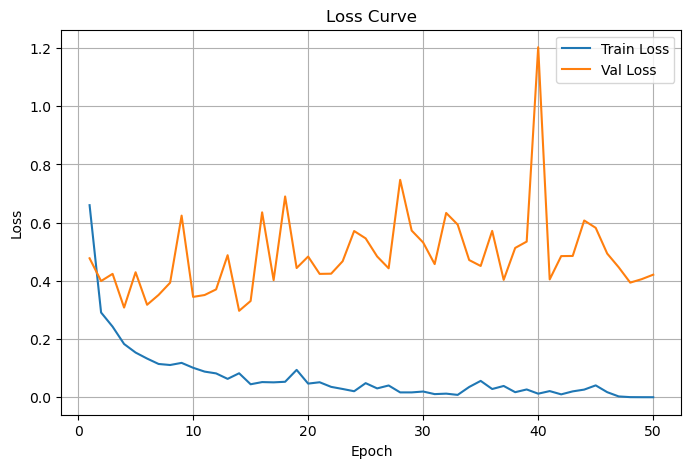

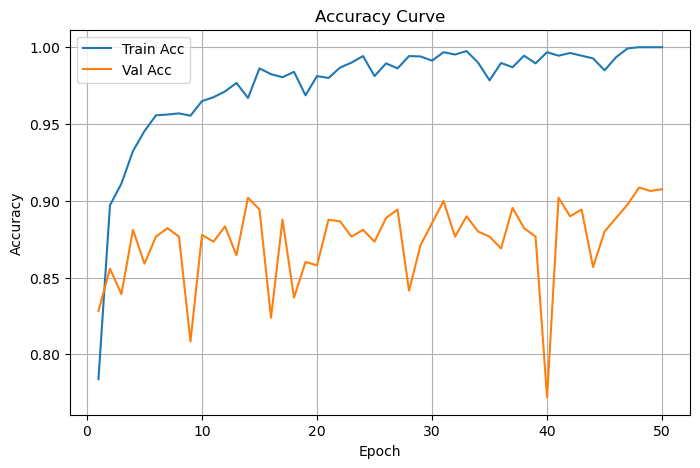

In [ ]:
# 5. plots for report
trainer.plot_history()

In [ ]:
# 6. save artifacts

trainer.save_curves_and_config(output_dir=output_dir)

[Trainer] Saved curves and config to:
  output_20251123_131530\modelnet10_pointpillars_loss.png
  output_20251123_131530\modelnet10_pointpillars_acc.png
  output_20251123_131530\modelnet10_pointpillars_history.csv
  output_20251123_131530\modelnet10_pointpillars_summary.json


In [ ]:
import csv

new_row = {

    "timestamp": timestamp,
    "name": config["dataset"]["name"],
    "num_classes": config["dataset"]["num_classes"],
    "num_points": config["dataset"]["num_points"],
    "pillar_size": config["voxelizer"]["pillar_size"],
    "max_pillars": config["voxelizer"]["max_pillars"],
    "max_points_per_pillar": config["voxelizer"]["max_points_per_pillar"],
    "pfn_out_dim": config["pfn"]["out_dim"],
    "bb_base_channels": config["backbone"]["base_channels"],
    "bb_fc1_dim": config["backbone"]["fc1_dim"],
    "bb_dropout_p": config["backbone"]["dropout_p"],
    "batch_size": config["train"]["batch_size"],
    "lr": config["train"]["lr"],
    "weight_decay": config["train"]["weight_decay"],
    "num_epochs": config["train"]["num_epochs"],
    "min_train_loss": min(trainer.history["train_loss"]),
    "min_val_loss": min(trainer.history["val_loss"]),
    "max_train_acc": max(trainer.history["train_acc"]),
    "max_val_acc": max(trainer.history["val_acc"])
}

csv_path = "config_log.csv"

# Append mode
with open(csv_path, "a", newline="") as f:
    writer = csv.DictWriter(f, fieldnames=new_row.keys())

    # Write header only if file is empty
    if f.tell() == 0:
        writer.writeheader()

    writer.writerow(new_row)
